In [364]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline

## Loading the dataset

In [365]:
data = pd.read_csv('Movie_collection_train.csv')

By using info() we can see data types and how many NAN values are there

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Time_taken           392 non-null    float64
 13  Twitter_hastags      400 non-null    float64
 14  Genre                400 non-null    object 
 15  Avg_age_actors       400 non-null    int

By using this isnull().sum() we can find number of NAN values in each column

In [367]:
data.isnull().sum()

Collection             0
Marketin_expense       0
Production_expense     0
Multiplex_coverage     0
Budget                 0
Movie_length           0
Lead_ Actor_Rating     0
Lead_Actress_rating    0
Director_rating        0
Producer_rating        0
Critic_rating          0
Trailer_views          0
Time_taken             8
Twitter_hastags        0
Genre                  0
Avg_age_actors         0
MPAA_film_rating       0
Num_multiplex          0
3D_available           0
dtype: int64

This shape method is used to find the size of the dataset (rows & columns)

In [368]:
data.shape

(400, 19)

In [369]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO


In [370]:
data['Time_taken'].median()

159.72

Here i'm filling NAN values with median value of 'Time_taken' and creating a new feature called **Time_taken_median** 

In [371]:
data['Time_taken_median'] = data['Time_taken'].fillna(data['Time_taken'].median())

In [372]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available,Time_taken_median
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,Thriller,23,PG,494,YES,109.60
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,Drama,42,PG,462,NO,146.64
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,Comedy,38,PG,458,NO,147.88
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,Drama,45,PG,472,YES,185.36
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,Drama,55,PG,395,NO,176.48


In [373]:
data['3D_available'].unique()

array(['YES', 'NO'], dtype=object)

Here in **3D_available** column we have only two values either YES or NO so i'm replacing YES with 1 and NO with 0

In [374]:
data['3D_available_num'] = np.where(data['3D_available']=='YES',1,0)

In [375]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,...,Trailer_views,Time_taken,Twitter_hastags,Genre,Avg_age_actors,MPAA_film_rating,Num_multiplex,3D_available,Time_taken_median,3D_available_num
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,...,527367,109.60,223.840,Thriller,23,PG,494,YES,109.60,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,...,494055,146.64,243.456,Drama,42,PG,462,NO,146.64,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,...,547051,147.88,2022.400,Comedy,38,PG,458,NO,147.88,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,...,516279,185.36,225.344,Drama,45,PG,472,YES,185.36,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,...,531448,176.48,225.792,Drama,55,PG,395,NO,176.48,0


In this **MPAA_film_rating** column we have only one value so we can drop that column

In [376]:
data['MPAA_film_rating'].unique()

array(['PG'], dtype=object)

In [377]:
data.drop(['MPAA_film_rating','Time_taken','3D_available'],axis=1,inplace=True)

In [378]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Time_taken_median,3D_available_num
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,Thriller,23,494,109.60,1
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,Drama,42,462,146.64,0
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,Comedy,38,458,147.88,0
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,Drama,45,472,185.36,1
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,Drama,55,395,176.48,0


In [379]:
data['Genre'].unique()

array(['Thriller', 'Drama', 'Comedy', 'Action'], dtype=object)

#### Label Encoder
In this Genre column we have 4 types of value, so I'm encoding these by using **LabelEncoder** so all the data present in the dataset is numerical only.

In [380]:
label_encoder = preprocessing.LabelEncoder()
data['Genre_num'] = label_encoder.fit_transform(data['Genre'])

In [381]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Time_taken_median,3D_available_num,Genre_num
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,Thriller,23,494,109.60,1,3
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,Drama,42,462,146.64,0,2
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,Comedy,38,458,147.88,0,1
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,Drama,45,472,185.36,1,2
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,Drama,55,395,176.48,0,2


In [382]:
data.drop('Genre',axis=1,inplace=True)

In [383]:
data.columns

Index(['Collection', 'Marketin_expense', 'Production_expense',
       'Multiplex_coverage', 'Budget', 'Movie_length', 'Lead_ Actor_Rating',
       'Lead_Actress_rating', 'Director_rating', 'Producer_rating',
       'Critic_rating', 'Trailer_views', 'Twitter_hastags', 'Avg_age_actors',
       'Num_multiplex', 'Time_taken_median', '3D_available_num', 'Genre_num'],
      dtype='object')

In [384]:
data.head()

,Collection,Marketin_expense,Production_expense,Multiplex_coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Twitter_hastags,Avg_age_actors,Num_multiplex,Time_taken_median,3D_available_num,Genre_num
0,48000,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,223.840,23,494,109.60,1,3
1,43200,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,243.456,42,462,146.64,0,2
2,69400,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,2022.400,38,458,147.88,0,1
3,66800,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,225.344,45,472,185.36,1,2
4,72400,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,225.792,55,395,176.48,0,2


In [385]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Collection           400 non-null    int64  
 1   Marketin_expense     400 non-null    float64
 2   Production_expense   400 non-null    float64
 3   Multiplex_coverage   400 non-null    float64
 4   Budget               400 non-null    float64
 5   Movie_length         400 non-null    float64
 6   Lead_ Actor_Rating   400 non-null    float64
 7   Lead_Actress_rating  400 non-null    float64
 8   Director_rating      400 non-null    float64
 9   Producer_rating      400 non-null    float64
 10  Critic_rating        400 non-null    float64
 11  Trailer_views        400 non-null    int64  
 12  Twitter_hastags      400 non-null    float64
 13  Avg_age_actors       400 non-null    int64  
 14  Num_multiplex        400 non-null    int64  
 15  Time_taken_median    400 non-null    flo

In [386]:
data.shape

(400, 18)

### Plotting

<AxesSubplot:xlabel='Marketin_expense', ylabel='Collection'>

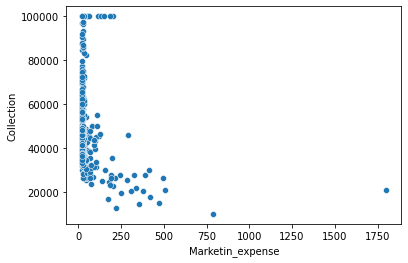

In [387]:
# features = iter([i for i in data.columns if i !='Collection'])
sns.scatterplot(x='Marketin_expense',y='Collection',data=data)

Here two points are located at very far, so i can remove those ouliers

In [388]:
data.drop(data[data['Marketin_expense']>750].index,inplace=True)

<AxesSubplot:xlabel='Marketin_expense', ylabel='Collection'>

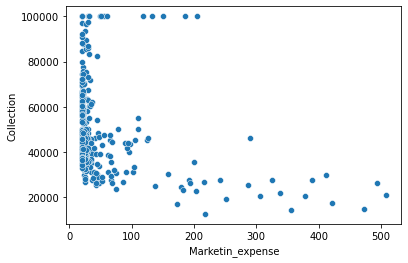

In [389]:
sns.scatterplot(x='Marketin_expense',y='Collection',data=data)

<AxesSubplot:xlabel='Production_expense', ylabel='Collection'>

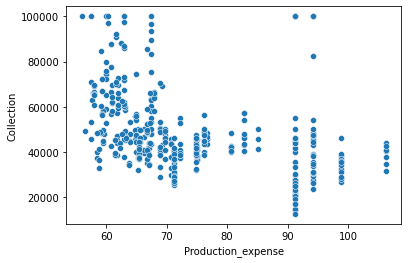

In [390]:
sns.scatterplot(x='Production_expense',y='Collection',data=data)

<AxesSubplot:xlabel='Multiplex_coverage', ylabel='Collection'>

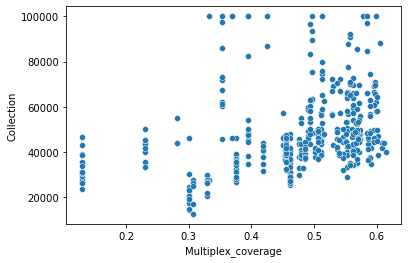

In [391]:
sns.scatterplot(x='Multiplex_coverage',y='Collection',data=data)

<AxesSubplot:xlabel='Budget', ylabel='Collection'>

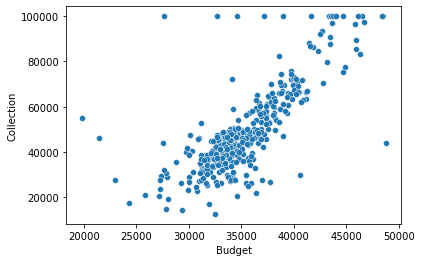

In [392]:
sns.scatterplot(x='Budget',y='Collection',data=data)

<AxesSubplot:xlabel='Movie_length', ylabel='Collection'>

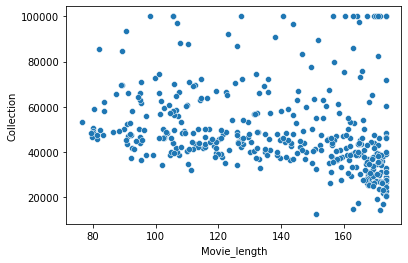

In [393]:
sns.scatterplot(x='Movie_length',y='Collection',data=data)

<AxesSubplot:xlabel='Lead_ Actor_Rating', ylabel='Collection'>

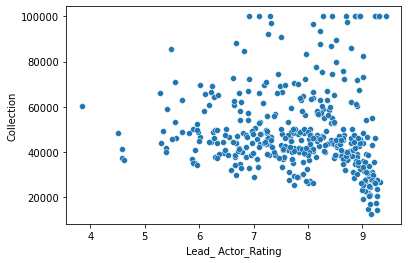

In [394]:
sns.scatterplot(x='Lead_ Actor_Rating',y='Collection',data=data)

<AxesSubplot:xlabel='Lead_Actress_rating', ylabel='Collection'>

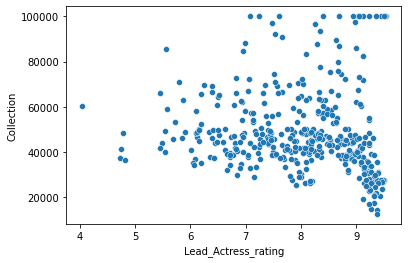

In [395]:
sns.scatterplot(x='Lead_Actress_rating',y='Collection',data=data)

<AxesSubplot:xlabel='Director_rating', ylabel='Collection'>

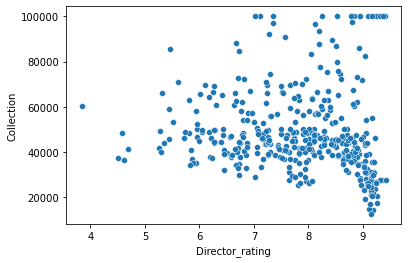

In [396]:
sns.scatterplot(x='Director_rating',y='Collection',data=data)

<AxesSubplot:xlabel='Producer_rating', ylabel='Collection'>

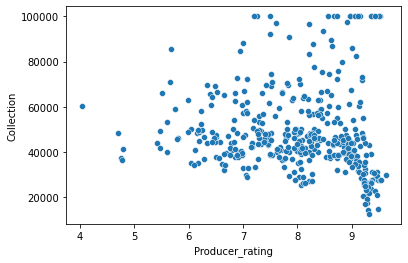

In [397]:
sns.scatterplot(x='Producer_rating',y='Collection',data=data)

<AxesSubplot:xlabel='Critic_rating', ylabel='Collection'>

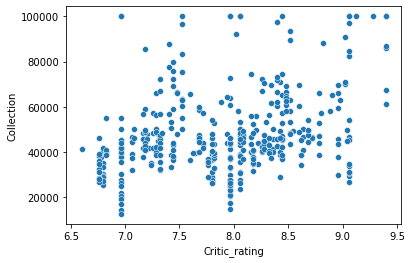

In [398]:
sns.scatterplot(x='Critic_rating',y='Collection',data=data)

<AxesSubplot:xlabel='Trailer_views', ylabel='Collection'>

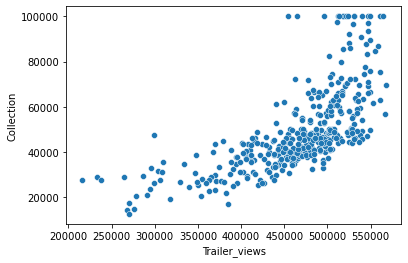

In [399]:
sns.scatterplot(x='Trailer_views',y='Collection',data=data)

<AxesSubplot:xlabel='Twitter_hastags', ylabel='Collection'>

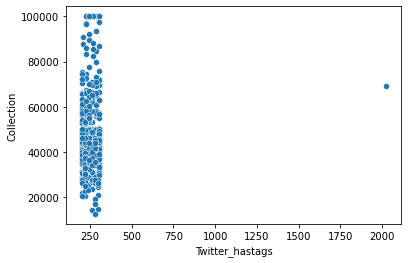

In [400]:
sns.scatterplot(x='Twitter_hastags',y='Collection',data=data)

Here one points is located at very far, so i can remove that oulier

<AxesSubplot:xlabel='Twitter_hastags', ylabel='Collection'>

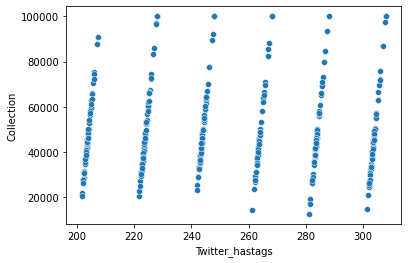

In [401]:
data.drop(data[data['Twitter_hastags']>2000].index,inplace=True)
sns.scatterplot(x='Twitter_hastags',y='Collection',data=data)

<AxesSubplot:xlabel='Avg_age_actors', ylabel='Collection'>

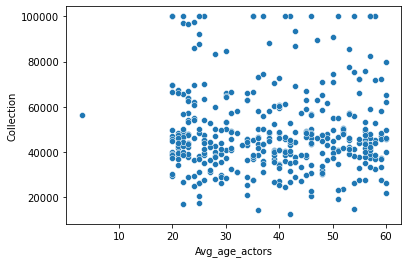

In [402]:
sns.scatterplot(x='Avg_age_actors',y='Collection',data=data)

Here one point is located at very far, so i can remove that oulier

<AxesSubplot:xlabel='Avg_age_actors', ylabel='Collection'>

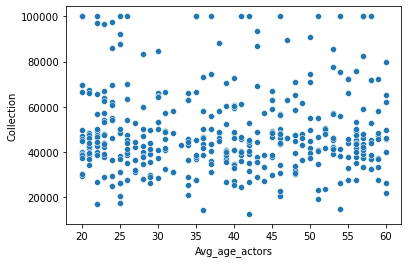

In [403]:
data.drop(data[data['Avg_age_actors']<10].index, inplace=True)
sns.scatterplot(x='Avg_age_actors',y='Collection',data=data)

<AxesSubplot:xlabel='Num_multiplex', ylabel='Collection'>

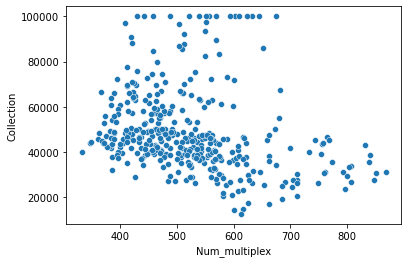

In [404]:
sns.scatterplot(x='Num_multiplex',y='Collection',data=data)

Here one point is located at very far, so i can remove that oulier

<AxesSubplot:xlabel='Time_taken_median', ylabel='Collection'>

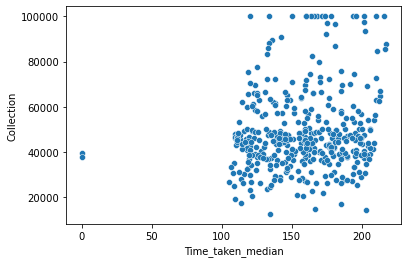

In [405]:
sns.scatterplot(x='Time_taken_median',y='Collection',data=data)

<AxesSubplot:xlabel='Time_taken_median', ylabel='Collection'>

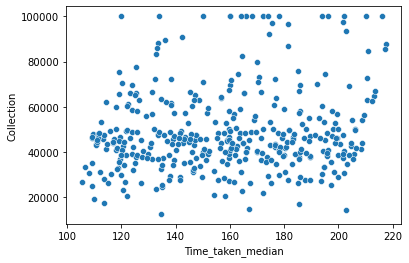

In [406]:
data.drop(data[data['Time_taken_median']<50].index, inplace=True)
sns.scatterplot(x='Time_taken_median',y='Collection',data=data)

<AxesSubplot:xlabel='3D_available_num', ylabel='Collection'>

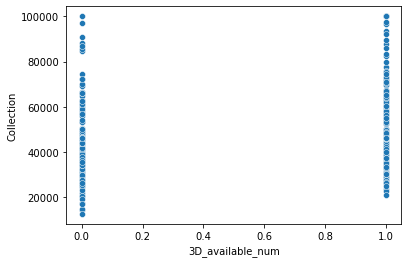

In [407]:
sns.scatterplot(x='3D_available_num',y='Collection',data=data)

<AxesSubplot:xlabel='Genre_num', ylabel='Collection'>

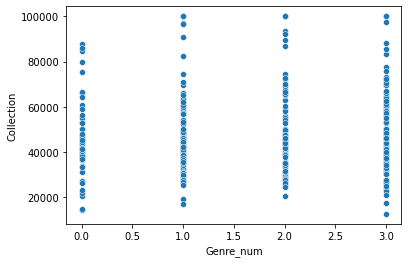

In [408]:
sns.scatterplot(x='Genre_num',y='Collection',data=data)

<AxesSubplot:>

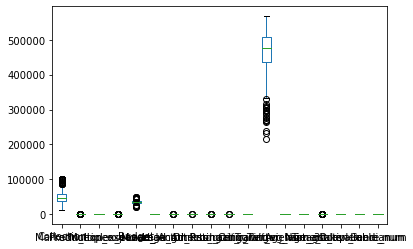

In [409]:
data.plot.box()

In [410]:
x = data.drop('Collection',axis=1)
y = data['Collection']

In [411]:
regressor = linear_model.LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [412]:
regressor.intercept_

-171990.22210071963

In [413]:
regressor.coef_

array([ 1.63313445e+01, -2.38478572e+01,  3.90373434e+04,  2.16660370e+00,
       -2.96358411e+01, -2.93027536e+02, -5.08329904e+03,  7.18751597e+03,
        2.59144080e+03,  3.98740987e+03,  9.73933323e-02,  1.23692174e+01,
        3.33346786e+01,  1.40607676e+01,  4.63637753e+01,  1.98500930e+03,
        3.97722002e+02])

In [414]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(275, 17) (119, 17) (275,) (119,)


In [415]:
regressor_a = linear_model.LinearRegression()
regressor_a.fit(x_train,y_train)

LinearRegression()

In [416]:
y_pred_test = regressor_a.predict(x_test)
y_pred_train = regressor_a.predict(x_train)

In [417]:
r2_score(y_test,y_pred_test)

0.6638045347508597

In [418]:
r2_score(y_train,y_pred_train)

0.6882687110913657

In [419]:
scaler = preprocessing.StandardScaler().fit(x_train)

In [420]:
x_train_scaler = scaler.transform(x_train)
x_test_scaler = scaler.transform(x_test)

In [421]:
from sklearn.linear_model import Ridge,Lasso

In [424]:
def find_r2score(method):
    r2_scores_list = []
    alpha=np.arange(-1,10,0.1)
    for i in alpha:
        if method == 'Ridge':
            regressor_ridge = Ridge(alpha=i)
            regressor_ridge.fit(x_train_scaler,y_train)
            r2_scores_list.append(r2_score(y_test,regressor_ridge.predict(x_test_scaler)))
        elif method == 'Lasso':
            regressor_lasso = Lasso(alpha=i)
            regressor_lasso.fit(x_train_scaler,y_train)
            r2_scores_list.append(r2_score(y_test,regressor_lasso.predict(x_test_scaler)))
    print(f"r2_score for {method} =",max(r2_scores_list))
find_r2score(method='Ridge')
find_r2score(method='Lasso')

r2_score for Ridge = 0.6682368873965792
r2_score for Lasso = 0.6634540751788969


In [425]:
from sklearn.model_selection import validation_curve

In [427]:
param_range = np.logspace(-8,8,100)
train_scores,test_scores = validation_curve(Ridge(),x_train,y_train,'alpha',param_range,scoring='r2')

In [429]:
train_mean = np.mean(train_scores,axis=1)
max(train_mean)

0.6944436708531738

In [430]:
test_mean = np.mean(test_scores,axis=1)
max(test_mean)

0.6208401664278084

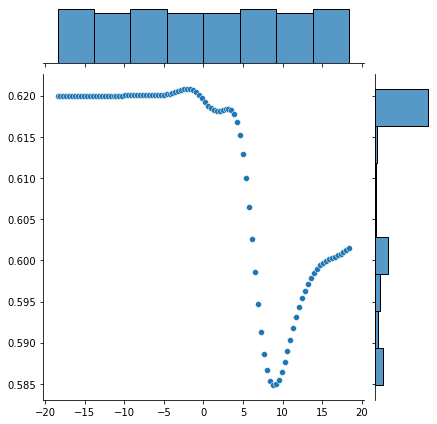

In [431]:
sns.jointplot(x=np.log(param_range),y=test_mean)

In [433]:
train_scores,test_scores = validation_curve(Lasso(),x_train,y_train,'alpha',param_range,scoring='r2')
train_mean = np.mean(train_scores,axis=1)
max(train_mean)

0.6944381564917828

In [434]:
test_mean = np.mean(test_scores,axis=1)
max(test_mean)

0.6210018892727325

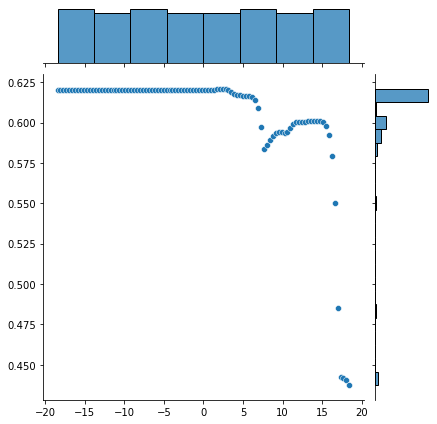

In [435]:
sns.jointplot(x=np.log(param_range),y=test_mean)